1. ЗАГРУЗКА И АНАЛИЗ ИСХОДНОГО ИЗОБРАЖЕНИЯ
✅ Изображение загружено успешно
   Размер: 600x400 пикселей
   Диапазон яркости: [0, 255]


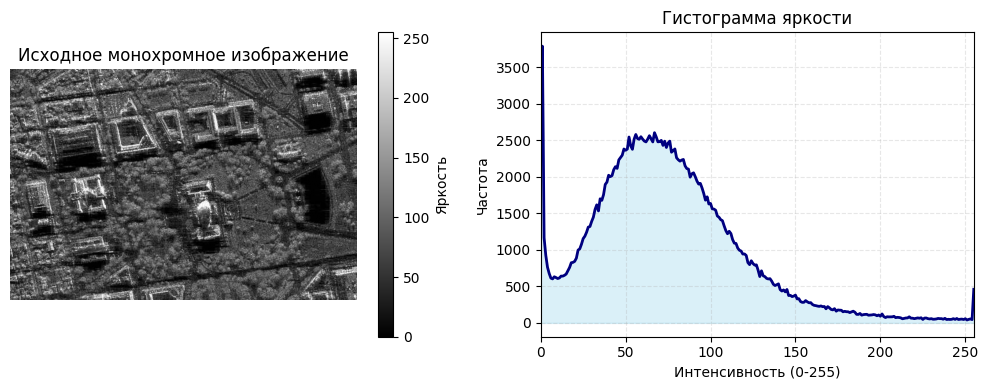

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

print("=" * 60)
print("1. ЗАГРУЗКА И АНАЛИЗ ИСХОДНОГО ИЗОБРАЖЕНИЯ")
print("=" * 60)

# Загрузка изображения
input_image = cv2.imread(r'D:\IP_UNN\lab1\image\sar_1_gray.jpg', cv2.IMREAD_GRAYSCALE)

# Проверка загрузки
if input_image is None:
    print("❌ Ошибка загрузки изображения! Проверьте путь.")
else:
    print(f"✅ Изображение загружено успешно")
    print(f"   Размер: {input_image.shape[1]}x{input_image.shape[0]} пикселей")
    print(f"   Диапазон яркости: [{input_image.min()}, {input_image.max()}]")

# Отображение исходного изображения
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Исходное монохромное изображение')
plt.axis('off')
plt.colorbar(label='Яркость')

plt.subplot(1, 2, 2)
brightness_dist = cv2.calcHist([input_image], [0], None, [256], [0, 256])
plt.plot(brightness_dist, color='navy', linewidth=2)
plt.title('Гистограмма яркости')
plt.xlabel('Интенсивность (0-255)')
plt.ylabel('Частота')
plt.xlim([0, 255])
plt.grid(True, alpha=0.3, linestyle='--')
plt.fill_between(range(256), brightness_dist.flatten(), alpha=0.3, color='skyblue')

plt.tight_layout()
plt.show()


In [4]:
print("\n" + "=" * 60)
print("2. РЕАЛИЗАЦИЯ ГАММА-КОРРЕКЦИИ")
print("=" * 60)

# Функция гамма-коррекции
def gamma_correction(image, gamma=1.0):
    """
    Применяет гамма-коррекцию к изображению

    Параметры:
    - image: исходное изображение (numpy array)
    - gamma: коэффициент гамма-коррекции

    Возвращает:
    - Скорректированное изображение
    """
    # Нормализация в диапазон [0, 1]
    normalized = image.astype(np.float32) / 255.0
    # Применение гамма-коррекции
    adjusted = np.power(normalized, gamma)
    # Возврат к диапазону [0, 255]
    return (adjusted * 255).astype(np.uint8)

# Применение различных параметров гамма-коррекции
print("Применяю гамма-коррекцию с разными параметрами...")
gamma_values = [0.6, 1.0, 1.4]  # α<1, α=1 (оригинал), α>1
adjusted_images = {}

for gamma in gamma_values:
    adjusted_images[gamma] = gamma_correction(input_image, gamma)
    print(f"   γ={gamma}: готово")

print("\nГотово к визуализации в следующей ячейке.")


2. РЕАЛИЗАЦИЯ ГАММА-КОРРЕКЦИИ
Применяю гамма-коррекцию с разными параметрами...
   γ=0.6: готово
   γ=1.0: готово
   γ=1.4: готово

Готово к визуализации в следующей ячейке.



3. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ГАММА-КОРРЕКЦИИ


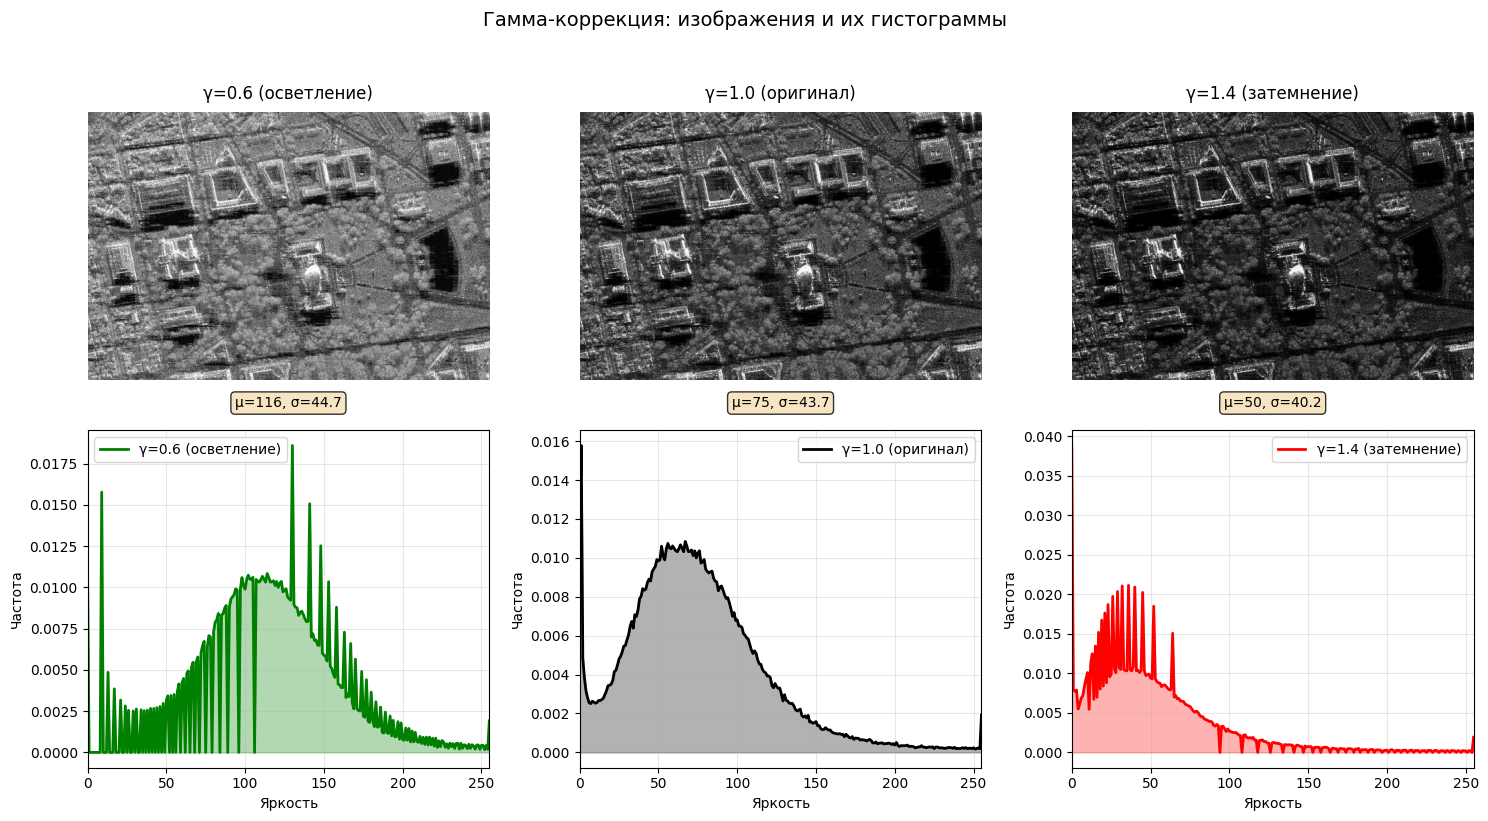

In [5]:
print("\n" + "=" * 60)
print("3. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ГАММА-КОРРЕКЦИИ")
print("=" * 60)

# Подготовка данных
gamma_values = [0.6, 1.0, 1.4]
images = [adjusted_images[0.6], input_image, adjusted_images[1.4]]
titles = ['γ=0.6 (осветление)', 'γ=1.0 (оригинал)', 'γ=1.4 (затемнение)']

# Создание фигуры
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Отображение изображений
for idx, (img, title) in enumerate(zip(images, titles)):
    axes[0, idx].imshow(img, cmap='gray')
    axes[0, idx].set_title(title, fontsize=12, pad=10)
    axes[0, idx].axis('off')

    # Статистика под изображением
    stats = f"μ={np.mean(img):.0f}, σ={np.std(img):.1f}"
    axes[0, idx].text(0.5, -0.1, stats, transform=axes[0, idx].transAxes,
                     ha='center', fontsize=10,
                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Отображение гистограмм
colors = ['green', 'black', 'red']
for idx, (img, color, title) in enumerate(zip(images, colors, titles)):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist = hist / hist.sum()  # Нормализация
    axes[1, idx].plot(hist, color=color, linewidth=2, label=title)
    axes[1, idx].fill_between(range(256), 0, hist.flatten(), color=color, alpha=0.3)
    axes[1, idx].set_xlabel('Яркость')
    axes[1, idx].set_ylabel('Частота')
    axes[1, idx].legend()
    axes[1, idx].grid(True, alpha=0.3)
    axes[1, idx].set_xlim([0, 255])

plt.suptitle('Гамма-коррекция: изображения и их гистограммы', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


4. КОЛИЧЕСТВЕННОЕ СРАВНЕНИЕ КАЧЕСТВА (MSE, SSIM)
Сравнение с оригинальным изображением:
--------------------------------------------------
Гамма-коррекция γ=0.6:
  • MSE  = 1784.27 (чем меньше, тем лучше)
  • SSIM = 0.854 (1.0 = идеальное совпадение)
Гамма-коррекция γ=1.4:
  • MSE  = 696.04
  • SSIM = 0.863


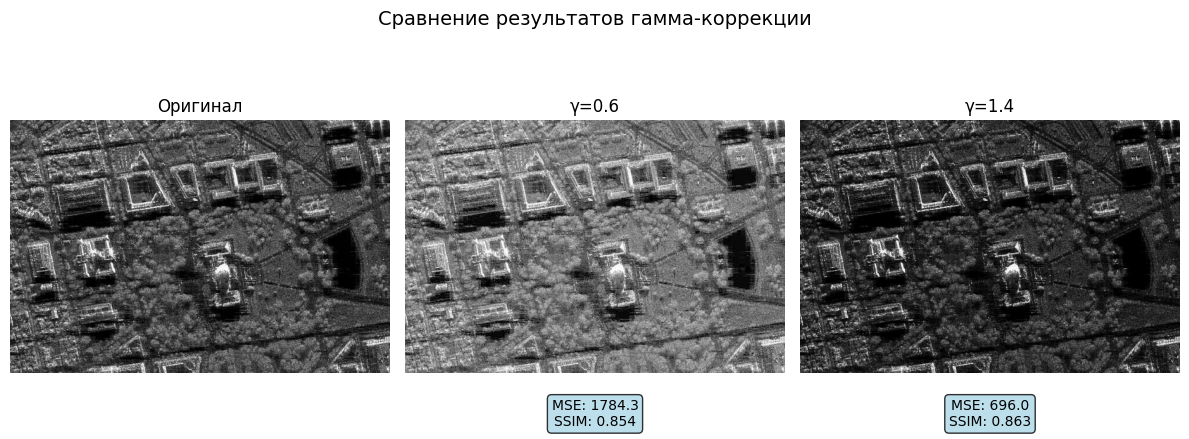

In [6]:
print("\n" + "=" * 60)
print("4. КОЛИЧЕСТВЕННОЕ СРАВНЕНИЕ КАЧЕСТВА (MSE, SSIM)")
print("=" * 60)

gamma_low, gamma_high = 0.6, 1.4
img_low = adjusted_images[gamma_low]
img_high = adjusted_images[gamma_high]

mse_low = mean_squared_error(input_image, img_low)
mse_high = mean_squared_error(input_image, img_high)
ssim_low = structural_similarity(input_image, img_low, data_range=255)
ssim_high = structural_similarity(input_image, img_high, data_range=255)

print("Сравнение с оригинальным изображением:")
print("-" * 50)
print(f"Гамма-коррекция γ={gamma_low}:")
print(f"  • MSE  = {mse_low:.2f} (чем меньше, тем лучше)")
print(f"  • SSIM = {ssim_low:.3f} (1.0 = идеальное совпадение)")
print(f"Гамма-коррекция γ={gamma_high}:")
print(f"  • MSE  = {mse_high:.2f}")
print(f"  • SSIM = {ssim_high:.3f}")


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

comparison_images = [input_image, img_low, img_high]
comparison_titles = ['Оригинал', f'γ={gamma_low}', f'γ={gamma_high}']
metrics_text = ['', f'MSE: {mse_low:.1f}\nSSIM: {ssim_low:.3f}',
                f'MSE: {mse_high:.1f}\nSSIM: {ssim_high:.3f}']

for idx, (img, title, metrics) in enumerate(zip(comparison_images, comparison_titles, metrics_text)):
    axes[idx].imshow(img, cmap='gray')
    axes[idx].set_title(title, fontsize=12)
    axes[idx].axis('off')

    if metrics:
        axes[idx].text(0.5, -0.1, metrics, transform=axes[idx].transAxes,
                      ha='center', va='top', fontsize=10,
                      bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.suptitle('Сравнение результатов гамма-коррекции', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()


5. СТАТИСТИЧЕСКАЯ ЦВЕТОКОРРЕКЦИЯ И ЭКВАЛИЗАЦИЯ
1. Применяю гистограммную эквализацию...
2. Выполняю статистическую коррекцию...
3. Коррекция завершена


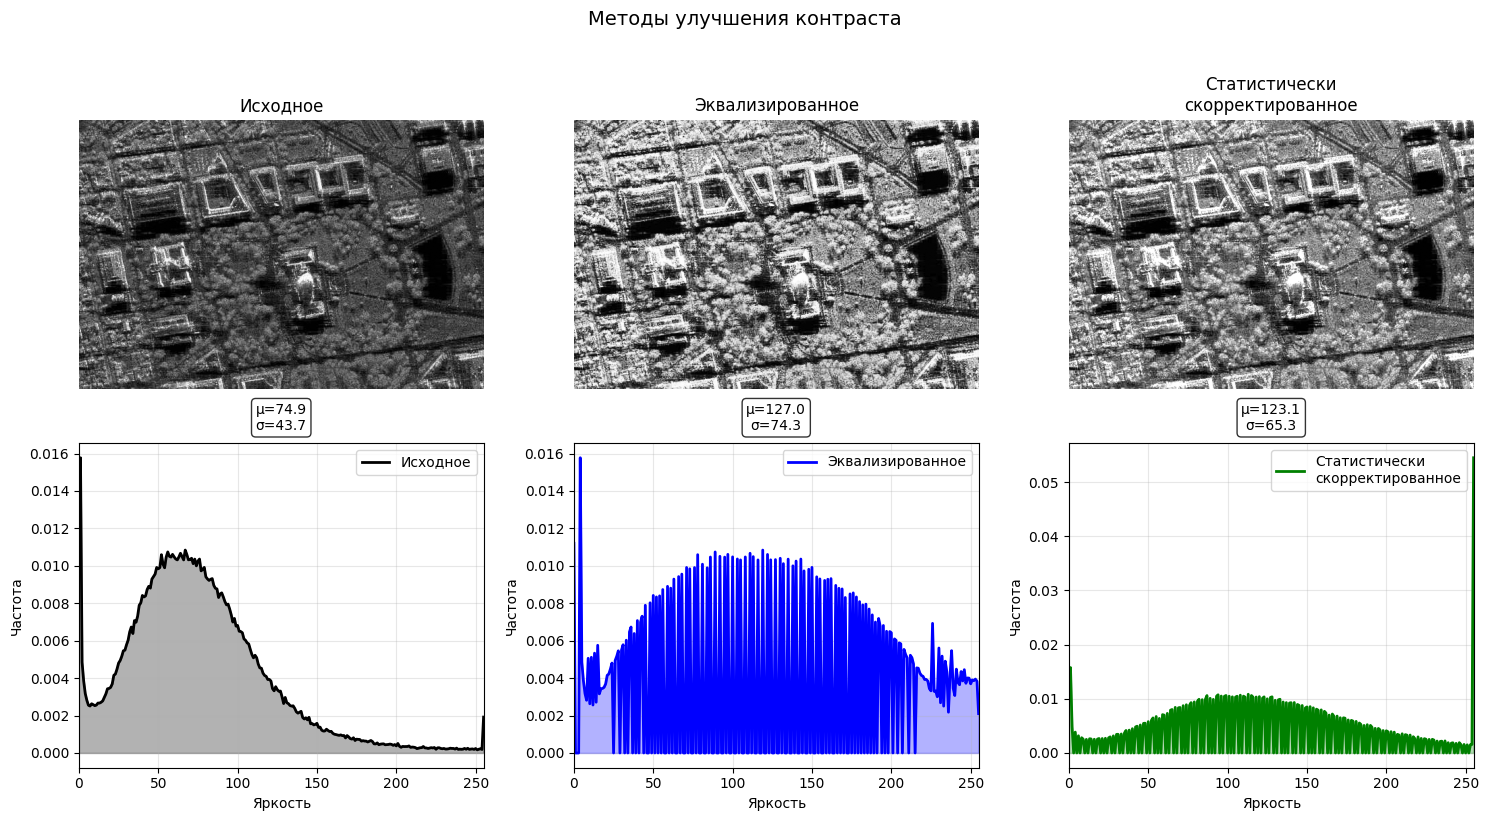


📊 Сводная статистика:
----------------------------------------
Метод                     Среднее    Стд. откл.
----------------------------------------
Исходное                  74.9       43.7      
Эквализированное          127.0      74.3      
Статистически
скорректированное 123.1      65.3      


In [7]:
print("\n" + "=" * 60)
print("5. СТАТИСТИЧЕСКАЯ ЦВЕТОКОРРЕКЦИЯ И ЭКВАЛИЗАЦИЯ")
print("=" * 60)

print("1. Применяю гистограммную эквализацию...")
equalized = cv2.equalizeHist(input_image)

print("2. Выполняю статистическую коррекцию...")
def statistical_correction(source, reference):
    """Коррекция статистик изображения относительно референса"""
    src_mean = np.mean(source)
    src_std = np.std(source)
    ref_mean = np.mean(reference)
    ref_std = np.std(reference)

    corrected = (source - src_mean) * (ref_std / (src_std + 1e-7)) + ref_mean
    return np.clip(corrected, 0, 255).astype(np.uint8)

stat_corrected = statistical_correction(input_image, equalized)
print("3. Коррекция завершена")

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

methods = [
    ('Исходное', input_image),
    ('Эквализированное', equalized),
    ('Статистически\nскорректированное', stat_corrected)
]

for idx, (title, img) in enumerate(methods):
    axes[0, idx].imshow(img, cmap='gray')
    axes[0, idx].set_title(title, fontsize=12)
    axes[0, idx].axis('off')

    stats = f"μ={np.mean(img):.1f}\nσ={np.std(img):.1f}"
    axes[0, idx].text(0.5, -0.15, stats, transform=axes[0, idx].transAxes,
                     ha='center', fontsize=10,
                     bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Гистограммы
colors = ['black', 'blue', 'green']
for idx, ((title, img), color) in enumerate(zip(methods, colors)):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist = hist / hist.sum()
    axes[1, idx].plot(hist, color=color, linewidth=2, label=title)
    axes[1, idx].fill_between(range(256), 0, hist.flatten(), color=color, alpha=0.3)
    axes[1, idx].set_xlabel('Яркость')
    axes[1, idx].set_ylabel('Частота')
    axes[1, idx].legend(loc='upper right')
    axes[1, idx].grid(True, alpha=0.3)
    axes[1, idx].set_xlim([0, 255])

plt.suptitle('Методы улучшения контраста', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("\n📊 Сводная статистика:")
print("-" * 40)
print(f"{'Метод':<25} {'Среднее':<10} {'Стд. откл.':<10}")
print("-" * 40)
for title, img in methods:
    print(f"{title:<25} {np.mean(img):<10.1f} {np.std(img):<10.1f}")


6. ПОРОГОВАЯ ФИЛЬТРАЦИЯ С РАЗНЫМИ ПАРАМЕТРАМИ
Применяю пороговую фильтрацию...
   Порог 60: 144,274 белых пикс. (60.1%)
   Порог 110: 41,463 белых пикс. (17.3%)
   Порог 160: 10,172 белых пикс. (4.2%)
   Порог 210: 2,979 белых пикс. (1.2%)

Дополнительные методы бинаризации:


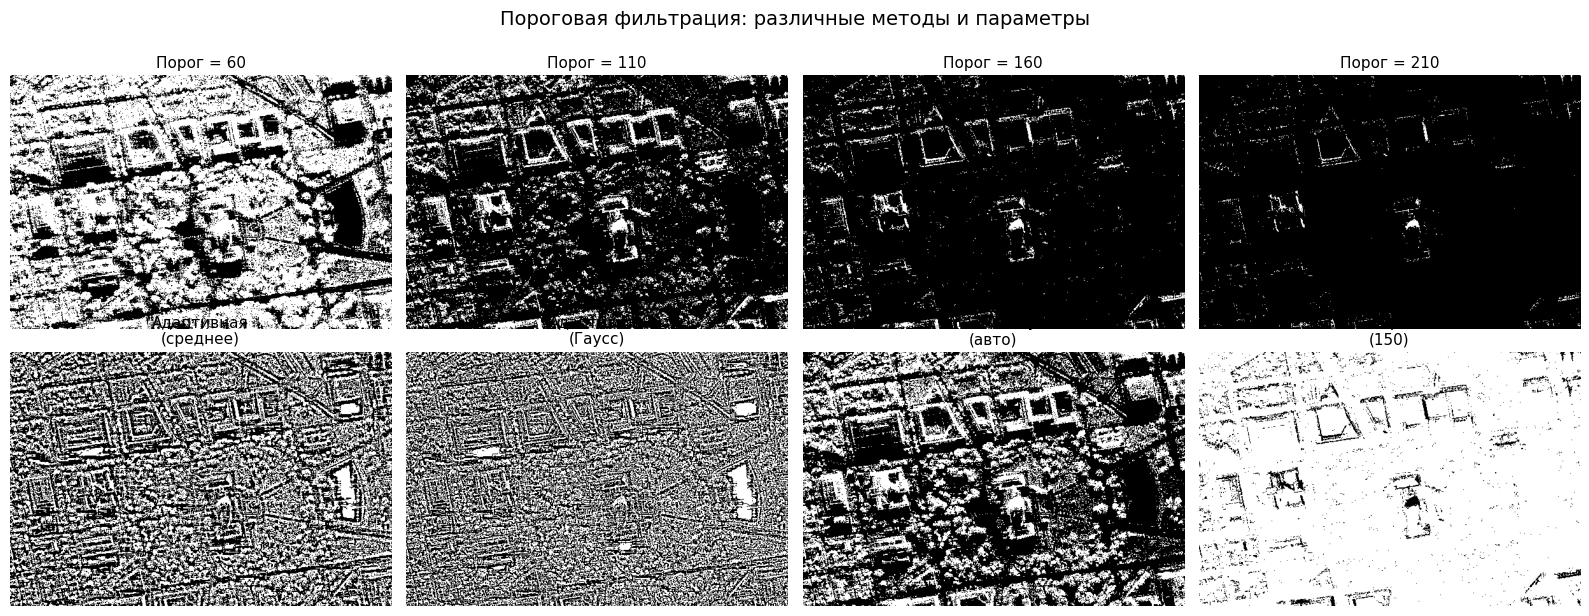


✅ Все этапы обработки изображений завершены!


In [8]:
print("\n" + "=" * 60)
print("6. ПОРОГОВАЯ ФИЛЬТРАЦИЯ С РАЗНЫМИ ПАРАМЕТРАМИ")
print("=" * 60)

# Различные пороговые значения
threshold_levels = [60, 110, 160, 210]

print("Применяю пороговую фильтрацию...")
binary_results = {}

for threshold in threshold_levels:
    _, binary = cv2.threshold(input_image, threshold, 255, cv2.THRESH_BINARY)
    binary_results[threshold] = binary

    # Статистика
    white_pixels = np.sum(binary == 255)
    total_pixels = binary.size
    white_percent = (white_pixels / total_pixels) * 100
    print(f"   Порог {threshold}: {white_pixels:,} белых пикс. ({white_percent:.1f}%)")

# Визуализация
fig, axes = plt.subplots(2, 4, figsize=(16, 6))

# Пороговая фильтрация
for idx, threshold in enumerate(threshold_levels):
    axes[0, idx].imshow(binary_results[threshold], cmap='gray')
    axes[0, idx].set_title(f'Порог = {threshold}', fontsize=11)
    axes[0, idx].axis('off')

print("\nДополнительные методы бинаризации:")

adaptive_mean = cv2.adaptiveThreshold(input_image, 255,
                                      cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)

adaptive_gauss = cv2.adaptiveThreshold(input_image, 255,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)


_, otsu = cv2.threshold(input_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


_, inverted = cv2.threshold(input_image, 150, 255, cv2.THRESH_BINARY_INV)

additional_methods = [
    ('Адаптивная\n(среднее)', adaptive_mean),
    ('Адаптивная\n(Гаусс)', adaptive_gauss),
    ('Метод Оцу\n(авто)', otsu),
    ('Инверсия\n(150)', inverted)
]

for idx, (title, img) in enumerate(additional_methods):
    axes[1, idx].imshow(img, cmap='gray')
    axes[1, idx].set_title(title, fontsize=11)
    axes[1, idx].axis('off')

plt.suptitle('Пороговая фильтрация: различные методы и параметры', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("\n✅ Все этапы обработки изображений завершены!")